In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
data = pd.read_csv(r'../data-new/full_data.csv', index_col = 0)

In [3]:
data.head(2)

,username,fullName,biography,externalUrl,followersCount,followsCount,hasChannel,highlightReelCount,isBusinessAccount,joinedRecently,businessCategoryName,private,verified,profilePicUrl,postsCount,med_likes,status
0,maahgalleryyy,maahgalleryyy,🌙گــالری مـــاه🌙\n.\n⭐️اکسسوری های مو و شنیون⭐...,False,3898.0,753.0,False,11.0,False,False,NaN,False,False,True,66.0,172.5,0
1,Restricted profile,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,0


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, 0 to 655
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   username              656 non-null    object 
 1   fullName              473 non-null    object 
 2   biography             386 non-null    object 
 3   externalUrl           656 non-null    bool   
 4   followersCount        644 non-null    float64
 5   followsCount          644 non-null    float64
 6   hasChannel            644 non-null    object 
 7   highlightReelCount    644 non-null    float64
 8   isBusinessAccount     644 non-null    object 
 9   joinedRecently        644 non-null    object 
 10  businessCategoryName  65 non-null     object 
 11  private               644 non-null    object 
 12  verified              644 non-null    object 
 13  profilePicUrl         656 non-null    bool   
 14  postsCount            644 non-null    float64
 15  med_likes             526 no

In [5]:
data = data[data["username"] != "Restricted profile"]

In [6]:
data.head()

,username,fullName,biography,externalUrl,followersCount,followsCount,hasChannel,highlightReelCount,isBusinessAccount,joinedRecently,businessCategoryName,private,verified,profilePicUrl,postsCount,med_likes,status
0,maahgalleryyy,maahgalleryyy,🌙گــالری مـــاه🌙\n.\n⭐️اکسسوری های مو و شنیون⭐...,False,3898.0,753.0,False,11.0,False,False,NaN,False,False,True,66.0,172.5,0
2,nilirose_waternili,گلاب و عرقیجات ممتاز نیلی,🌺گلاب و عرقیجات ممتاز نیلی 🌺\nکاشان_ نیاسر\nار...,False,279.0,763.0,False,2.0,True,False,Personal Goods & General Merchandise Stores,False,False,True,4.0,3.5,0
3,pleromadanceministry,Pleroma Abankz,MimeIsTheNewSpiritual🇬🇭\nChoreographer\nMime M...,True,1268.0,972.0,False,5.0,False,False,NaN,False,False,True,255.0,105.5,1
4,emmanuelesiet,Emmanuel Esiet,Adam in @n3sbestfriendsintheworld 🎬 \nCartooni...,False,207689.0,258.0,False,10.0,False,False,NaN,False,False,True,174.0,14238.5,1
5,itsmariammusa,Mariam Musa,@mimacosmeticsuk \nMeghan.Peterson@ymugroup.co...,True,608419.0,699.0,False,7.0,False,False,NaN,False,True,True,363.0,16770.0,1


Extracting features from username

In [7]:
data["username_len"] = data["username"].apply(len)

In [8]:
data.head()

,username,fullName,biography,externalUrl,followersCount,followsCount,hasChannel,highlightReelCount,isBusinessAccount,joinedRecently,businessCategoryName,private,verified,profilePicUrl,postsCount,med_likes,status,username_len
0,maahgalleryyy,maahgalleryyy,🌙گــالری مـــاه🌙\n.\n⭐️اکسسوری های مو و شنیون⭐...,False,3898.0,753.0,False,11.0,False,False,NaN,False,False,True,66.0,172.5,0,13
2,nilirose_waternili,گلاب و عرقیجات ممتاز نیلی,🌺گلاب و عرقیجات ممتاز نیلی 🌺\nکاشان_ نیاسر\nار...,False,279.0,763.0,False,2.0,True,False,Personal Goods & General Merchandise Stores,False,False,True,4.0,3.5,0,18
3,pleromadanceministry,Pleroma Abankz,MimeIsTheNewSpiritual🇬🇭\nChoreographer\nMime M...,True,1268.0,972.0,False,5.0,False,False,NaN,False,False,True,255.0,105.5,1,20
4,emmanuelesiet,Emmanuel Esiet,Adam in @n3sbestfriendsintheworld 🎬 \nCartooni...,False,207689.0,258.0,False,10.0,False,False,NaN,False,False,True,174.0,14238.5,1,13
5,itsmariammusa,Mariam Musa,@mimacosmeticsuk \nMeghan.Peterson@ymugroup.co...,True,608419.0,699.0,False,7.0,False,False,NaN,False,True,True,363.0,16770.0,1,13


In [9]:
import re 

# counting number of special characters in user name
pattern = r'[^a-zA-Z\d\s:]'
data["user_characters"] = data["username"].apply(lambda x: len(re.findall(pattern, x)))

In [10]:
# counting number of digits in username
data["user_digits"] = data["username"].str.count('\d')

Extracting features from fullname

In [11]:
data['fullName'] = data['fullName'].fillna('')


In [12]:
# counting number of characters in fullname
data["full_len"] = data["fullName"].apply(len)

#counting special characters in fullname
data["full_characters"] = data["fullName"].apply(lambda x: len(re.findall(pattern, x)))

#counting digits in fullname
data["full_digits"] = data["fullName"].str.count('\d')

Extracting features from biography

In [13]:
data['biography'][3]

'MimeIsTheNewSpiritual🇬🇭\nChoreographer\nMime Minister  \nJesus saves ❤🙏\nMinistering Dance Through The Art of the Prophetic \nYouTube channel 👇'

In [14]:
data["biography"] = data["biography"].str.replace('\n', ' ').str.strip()

In [15]:
data["biography"] = data["biography"].str.replace(' ', '').str.strip()

In [16]:
data['biography'][3]

'MimeIsTheNewSpiritual🇬🇭ChoreographerMimeMinisterJesussaves❤🙏MinisteringDanceThroughTheArtofthePropheticYouTubechannel👇'

In [17]:
data["biography"] = data["biography"].fillna('')

In [18]:
#length of bio
data["bio_len"] = data["biography"].apply(len)

import emoji
import emoji_data_python

#count of emojis in bio
data["bio_emojis"] = [len(emoji.emoji_list(c)) for c in data["biography"]]

In [19]:
data.head()

,username,fullName,biography,externalUrl,followersCount,followsCount,hasChannel,highlightReelCount,isBusinessAccount,joinedRecently,...,med_likes,status,username_len,user_characters,user_digits,full_len,full_characters,full_digits,bio_len,bio_emojis
0,maahgalleryyy,maahgalleryyy,🌙گــالریمـــاه🌙.⭐️اکسسوریهایمووشنیون⭐️.🌛دستبند...,False,3898.0,753.0,False,11.0,False,False,...,172.5,0,13,0,0,13,0,0,121,12
2,nilirose_waternili,گلاب و عرقیجات ممتاز نیلی,🌺گلابوعرقیجاتممتازنیلی🌺کاشان_نیاسرارسالرایگانب...,False,279.0,763.0,False,2.0,True,False,...,3.5,0,18,1,0,25,21,0,99,3
3,pleromadanceministry,Pleroma Abankz,MimeIsTheNewSpiritual🇬🇭ChoreographerMimeMinist...,True,1268.0,972.0,False,5.0,False,False,...,105.5,1,20,0,0,14,0,0,118,4
4,emmanuelesiet,Emmanuel Esiet,Adamin@n3sbestfriendsintheworld🎬Cartoonist@tin...,False,207689.0,258.0,False,10.0,False,False,...,14238.5,1,13,0,0,14,0,0,113,3
5,itsmariammusa,Mariam Musa,@mimacosmeticsukMeghan.Peterson@ymugroup.comCo...,True,608419.0,699.0,False,7.0,False,False,...,16770.0,1,13,0,0,11,0,0,75,0


# STATISTICAL ANALYSIS

In [20]:
# box plot visualization
def feature_distribution(feature, label, df):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(data = df, x = label, y = feature, ax = ax)
    
    return plt.plot()


In [21]:
# hypothesis testing function with chi-square
def hypo_test(feature):
    df = data[["status", feature]]
    df = df.groupby(["status"], as_index = False)[feature].sum()
    
    

Assessing statistical significance of features generated from username

[]

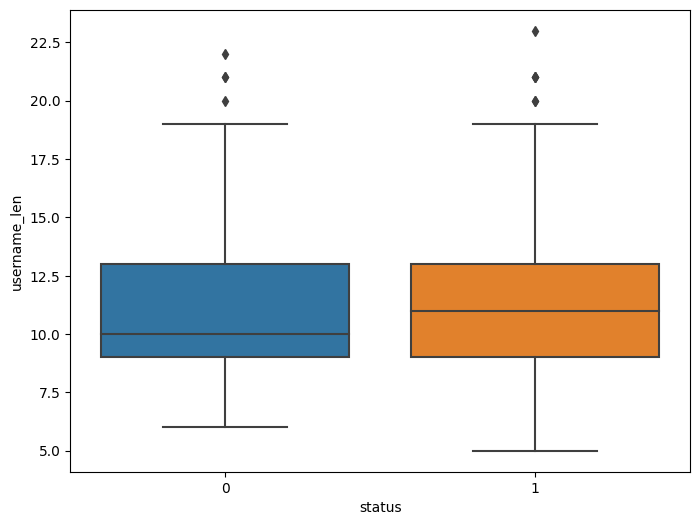

In [22]:
# user name length for fake and genuine accounts
feature_distribution(feature = "username_len", label = "status", df = data)

[]

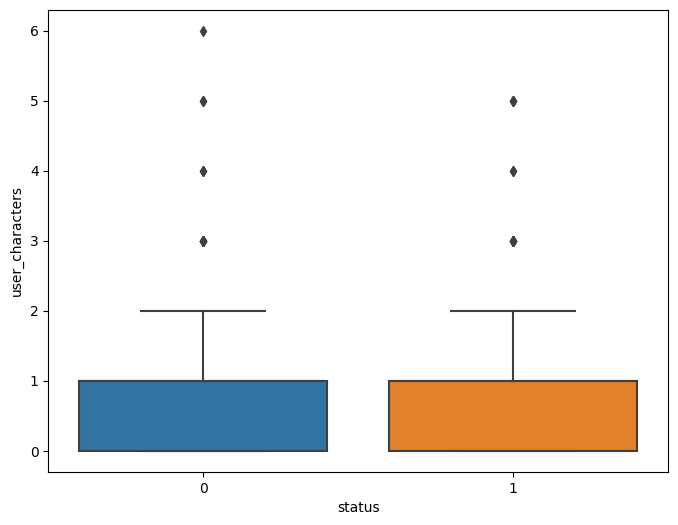

In [23]:
feature_distribution(feature = "user_characters", label = "status", df = data)

[]

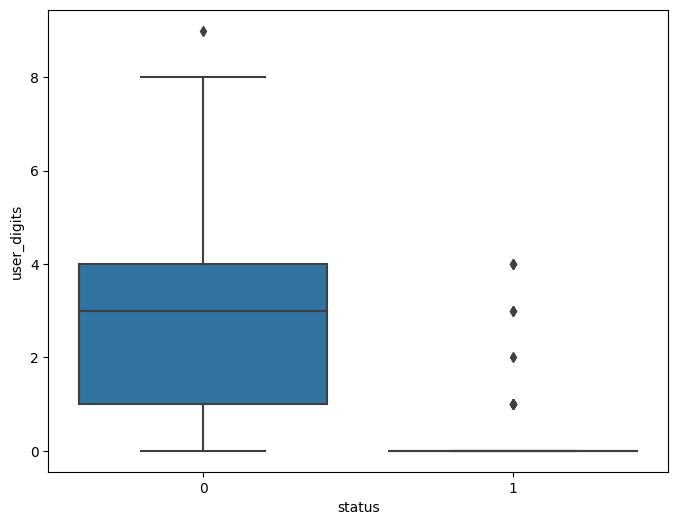

In [24]:
feature_distribution(feature = "user_digits", label = "status", df = data)

Visualizing distribution of features from fulname

[]

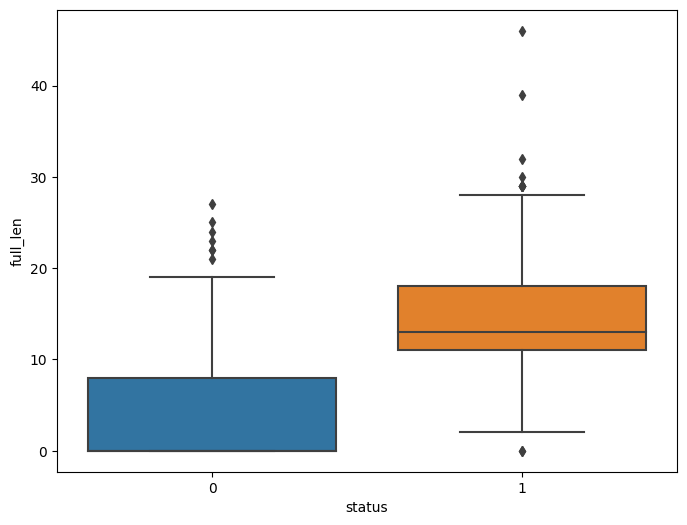

In [25]:
feature_distribution(feature = "full_len", label = "status", df = data)

[]

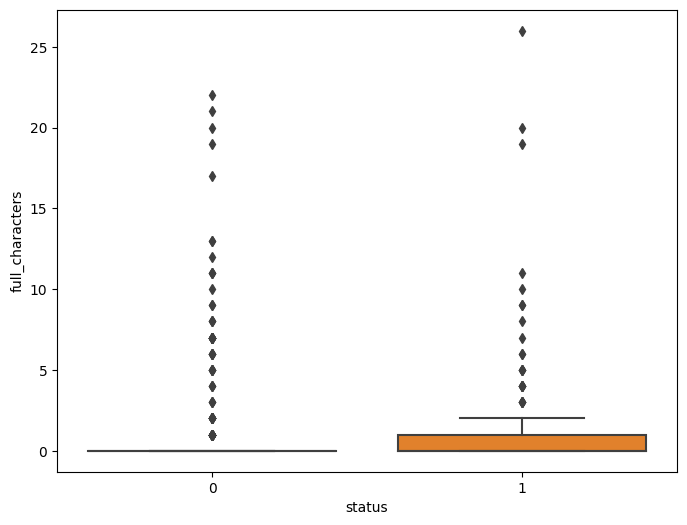

In [26]:
feature_distribution(feature = "full_characters", label = "status", df = data)

[]

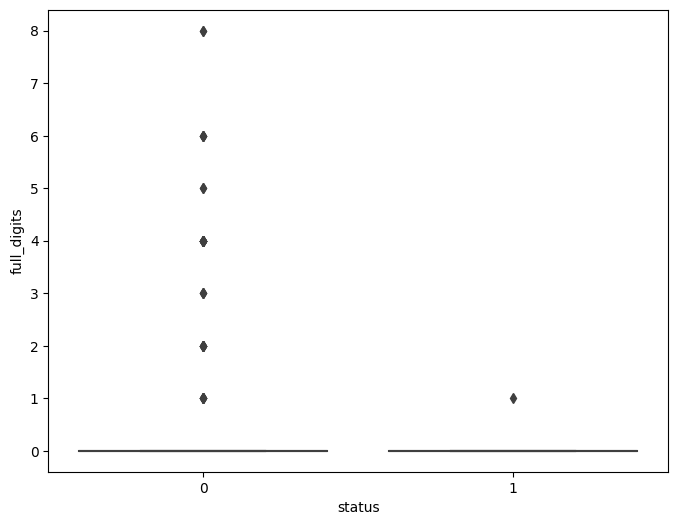

In [27]:
feature_distribution(feature = "full_digits", label = "status", df = data)

Visualizing distribution of fetaures from biography

[]

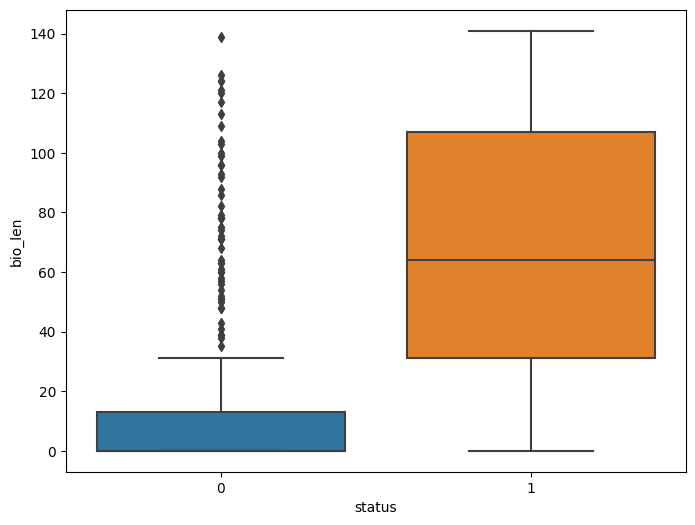

In [28]:
feature_distribution(feature = "bio_len", label = "status", df = data)

[]

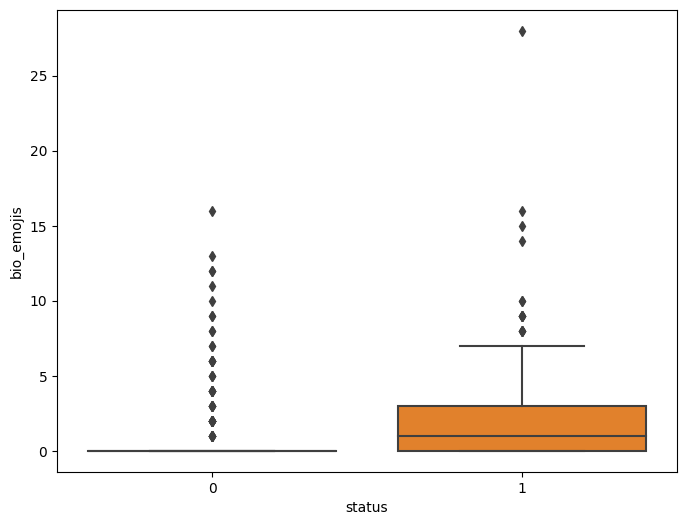

In [29]:
feature_distribution(feature = "bio_emojis", label = "status", df = data)

Visualizing distribution of other continous variable features.

[]

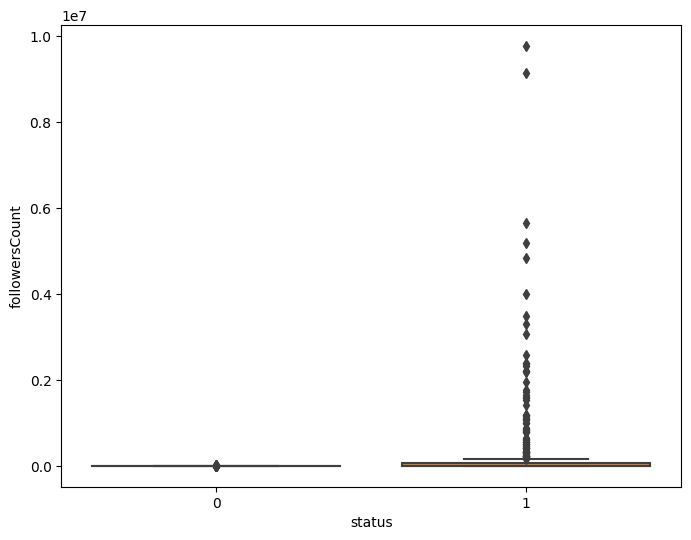

In [30]:
#post_count distribution
feature_distribution(feature = "followersCount", label = "status", df = data)

[]

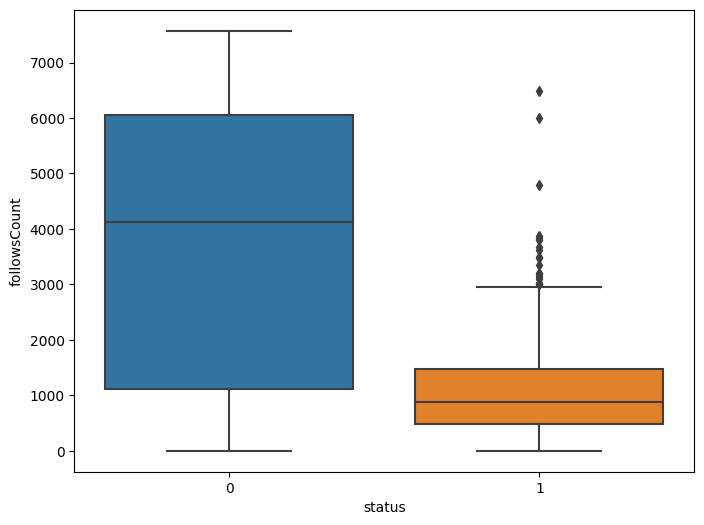

In [31]:
#post_count distribution
feature_distribution(feature = "followsCount", label = "status", df = data)

[]

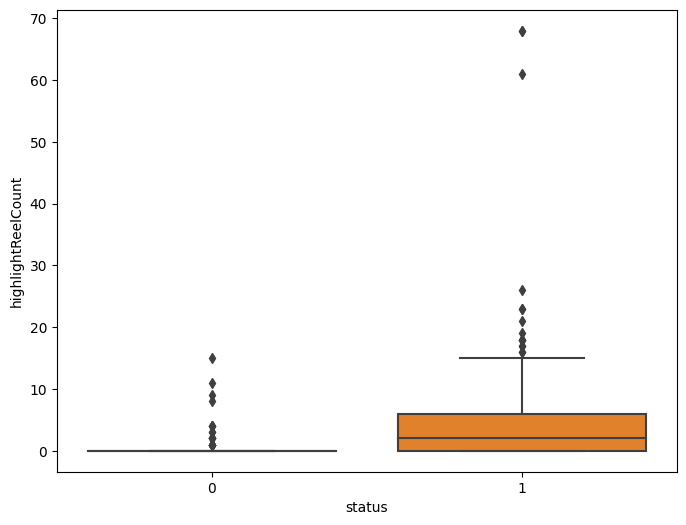

In [32]:
#post_count distribution
feature_distribution(feature = "highlightReelCount", label = "status", df = data)

[]

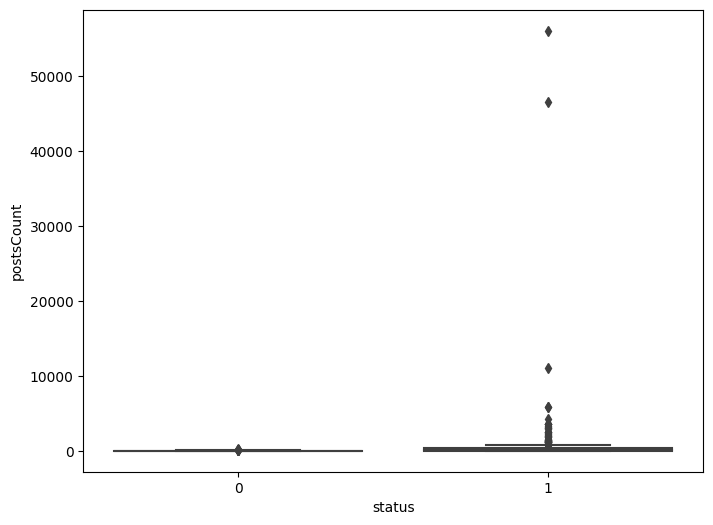

In [33]:
#post_count distribution
feature_distribution(feature = "postsCount", label = "status", df = data)

[]

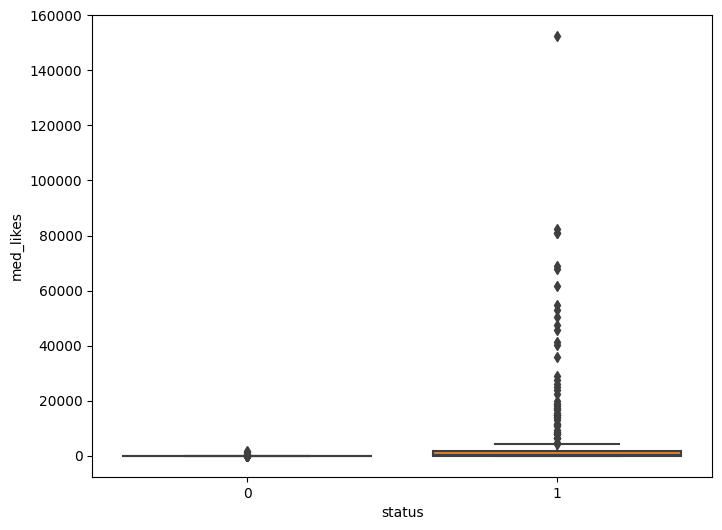

In [34]:
#post_count distribution
feature_distribution(feature = "med_likes", label = "status", df = data)

from the box plots, some features show a clear distinction of distributed for each label. ANOVA tests will be carried out to ascertain the stattistical significance of the distribution of the features with ambiguous distribution plots.

In [35]:
anova_features = ["full_digits", "user_characters", "username_len"]

In [36]:
from scipy.stats import f_oneway

In [37]:
anova_results = []
for feature in anova_features:
    # separate the data for the two groups
    genuine = data.loc[data['status'] == 1, feature]
    fake = data.loc[data['status'] == 0, feature]
    
    # perform ANOVA
    f_statistic, p_value = f_oneway(genuine, fake)
    
    # append the results to the list
    anova_results.append({'Feature': feature, 'F-Statistic': f_statistic, 'p-value': p_value})


anova_df = pd.DataFrame(anova_results)


In [38]:
anova_df

,Feature,F-Statistic,p-value
0,full_digits,27.986311,1.678238e-07
1,user_characters,0.737049,3.909281e-01
2,username_len,2.461272,1.171770e-01


The result shows a p-value > 0.05 for user_characters and user_len. Establishing that those two features do not have a bearing on the label of a user's account.

Investigating statistical significance of discrete variables with CHI-SQAURE

In [39]:
from scipy.stats import chi2_contingency

def chi_square_tests(df, cat_features, target_feature):
    results = pd.DataFrame(columns=['Feature', 'p-value'])
    
    for feature in cat_features:
        contingency_table = pd.crosstab(df[feature], df[target_feature])
        _, p, _, _ = chi2_contingency(contingency_table)
        results = results.append({'Feature': feature, 'p-value': p}, ignore_index=True)
    
    return results

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 0 to 655
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   username              644 non-null    object 
 1   fullName              644 non-null    object 
 2   biography             644 non-null    object 
 3   externalUrl           644 non-null    bool   
 4   followersCount        644 non-null    float64
 5   followsCount          644 non-null    float64
 6   hasChannel            644 non-null    object 
 7   highlightReelCount    644 non-null    float64
 8   isBusinessAccount     644 non-null    object 
 9   joinedRecently        644 non-null    object 
 10  businessCategoryName  65 non-null     object 
 11  private               644 non-null    object 
 12  verified              644 non-null    object 
 13  profilePicUrl         644 non-null    bool   
 14  postsCount            644 non-null    float64
 15  med_likes             526 no

In [41]:
def convert_to_bool_and_int(val):
    if val == 'True':
        return 1
    else:
        return 0

# List of columns to convert
bool_cols = ['externalUrl', 'hasChannel', 'isBusinessAccount', 'joinedRecently', 'private', 'verified', 'profilePicUrl']

# Loop through columns and apply the function
for col in bool_cols:
    data[col] = data[col].apply(lambda x: convert_to_bool_and_int(x)).astype(int)

In [42]:
from scipy.stats import chi2_contingency

def chi_square_tests(df, cat_features, target_feature):
    results = []
    for feature in cat_features:
        contingency_table = pd.crosstab(df[feature], df[target_feature])
        _, p, _, _ = chi2_contingency(contingency_table)
        results.append({'Feature': feature, 'p-value': p})
    return pd.DataFrame(results)

In [43]:
chi_square_tests(data, bool_cols, 'status')

,Feature,p-value
0,externalUrl,1.0
1,hasChannel,1.0
2,isBusinessAccount,1.0
3,joinedRecently,1.0
4,private,1.0
5,verified,1.0
6,profilePicUrl,1.0


In [44]:
model_data = data.drop(['username', 'fullName', 'biography', 'externalUrl', 'hasChannel', 'isBusinessAccount', 'businessCategoryName','joinedRecently', 'private', 'verified', 'profilePicUrl', 'user_characters', 'username_len'], axis = 1)

In [45]:
model_data.to_csv('../data-new/model_data.csv')